In [380]:
import random as rng
import numpy as np

from matplotlib import pyplot as plt 
plt.rcParams['figure.figsize'] = [20, 20]

def progres_bar(progress, total):
    precent = 100 * (progress / float(total))
    bar = '█' * int(precent) + '-' * int(100 - precent)
    print(f"\r|{bar}| {precent:.2f}%", end="\r")
    if precent == 100: print("")

def play(sDeff,sAttc,attackLimitTo=0,attackLimitUnits=0,dDice=False,aDice=False,dPlus=False,aPlus=False,show=True):
    deff = sDeff
    attc = sAttc 
    if attackLimitTo != 0:
        attc -= attackLimitTo - 1
    elif attackLimitUnits != 0:
        attc = attackLimitUnits + 1

    aloss = 0
    dloss = 0

    while True:
        if attc <= 1: 
            if show:
                if attackLimitTo != 0 or attackLimitUnits != 0:
                    print("Limmit Stop")
                else: 
                    print ("Defender Won")
                print(f'a: {sAttc-aloss}(-{aloss})')
                print(f'd: {sDeff-dloss}(-{dloss})')
            return 1
        if deff <= 0:
            if show:
                print("Attacker Won")
                print(f'a: {attc}(-{sAttc-attc})')
                print(f'd: {deff}(-{sDeff-deff})')
            return 0

        dDeff = (2 if deff > 1 else 1)
        dRoll = dDeff + dDice
        aAttc = (3 if attc > 3 else (2 if attc > 2 else 1))
        aRoll =  aAttc + aDice

        fight = min(dDeff,aAttc)

        dRolls = np.sort(np.array([rng.randint(1,6) for i in range(dRoll)]))[::-1]
        aRolls = np.sort(np.array([rng.randint(1,6) for i in range(aRoll)]))[::-1]

        # print(fight, attc, deff)
        # print(dRolls,aRolls)
        dRolls[0] += dPlus
        aRolls[0] += aPlus
        for i in range(fight):
            if dRolls[i] >= aRolls[i]:
                attc -= 1
                aloss += 1
            else: 
                deff -= 1
                dloss += 1
    # print(fight, attc, deff)

In [376]:
def show(title):
    plt.imshow(stats)
    for (j,i),label in np.ndenumerate(stats):
        plt.text(i,j,round(label,6),ha='center',va='center')
    #plt.colorbar()
    plt.xticks(range(maxT),range(2,maxT+2))
    plt.yticks(range(maxT),range(1,maxT+1))
    plt.xlabel("Attacker units", fontsize=16)
    plt.ylabel("Defender units", fontsize=16)
    plt.title(title,fontsize=24)

In [370]:
maxT = 20
maxIter = 1000

stats = np.zeros((maxT,maxT))
for d in range(maxT):
    for a in range(maxT):
        s = 0
        for i in range(maxIter):
            s += play(d+1,a+2,show=False)
        stats[d,a] = s / maxIter * 100 
        progres_bar(d*maxT + a + 1,maxT**2)

|████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00%


Text(0.5, 1.0, 'Defence probability no bonus')

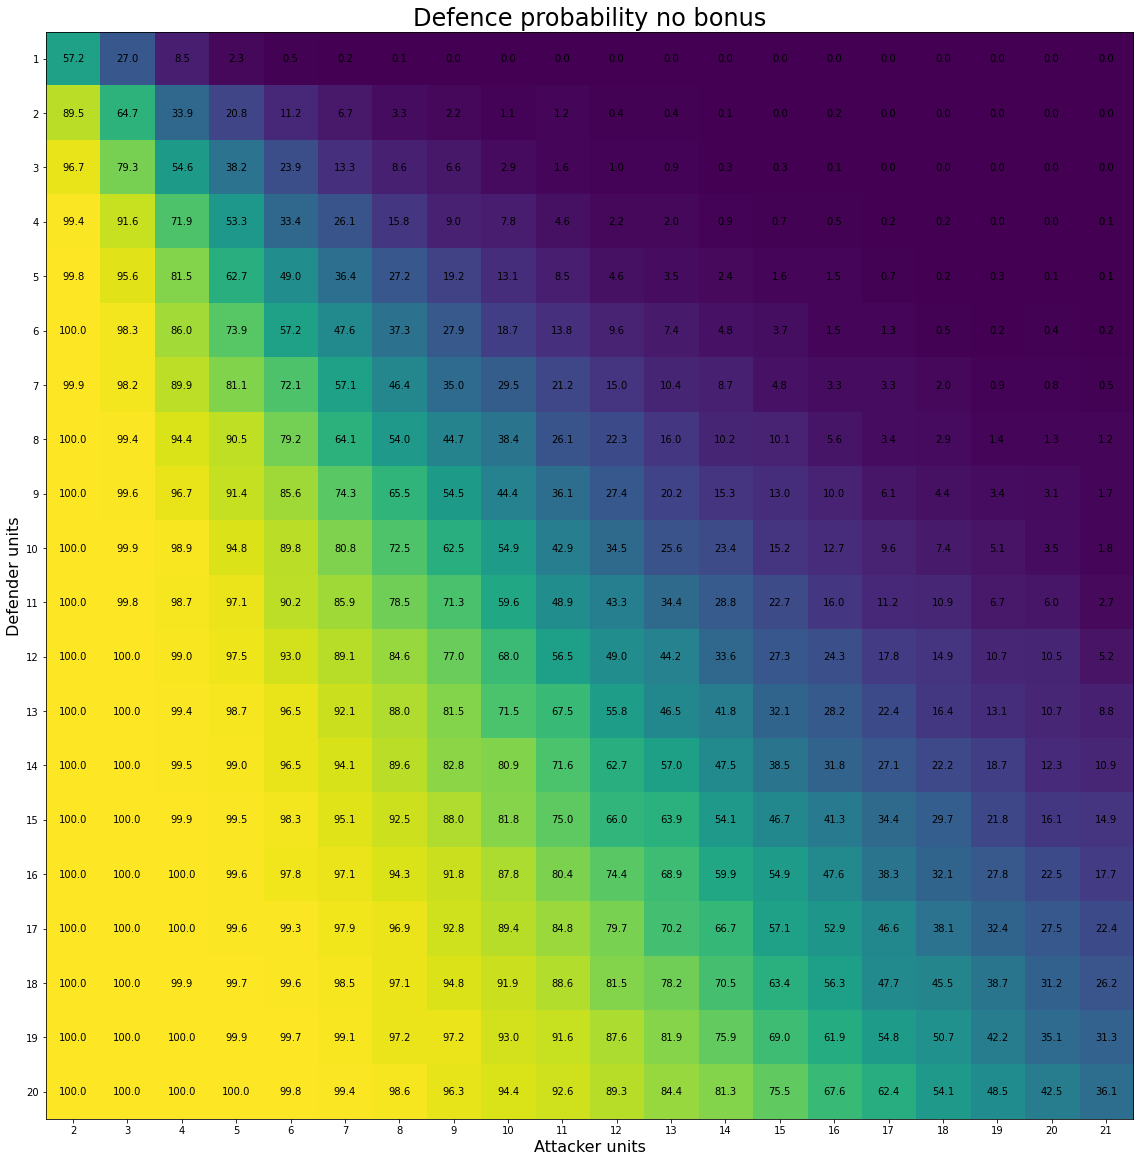

In [371]:
show("Defence probability no bonus")

In [372]:
maxT = 20
maxIter = 1000

stats = np.zeros((maxT,maxT))
for d in range(maxT):
    for a in range(maxT):
        s = 0
        for i in range(maxIter):
            s += play(d+1,a+2,dDice=True,show=False)
        stats[d,a] = s / maxIter * 100 
        progres_bar(d*maxT + a + 1,maxT**2)

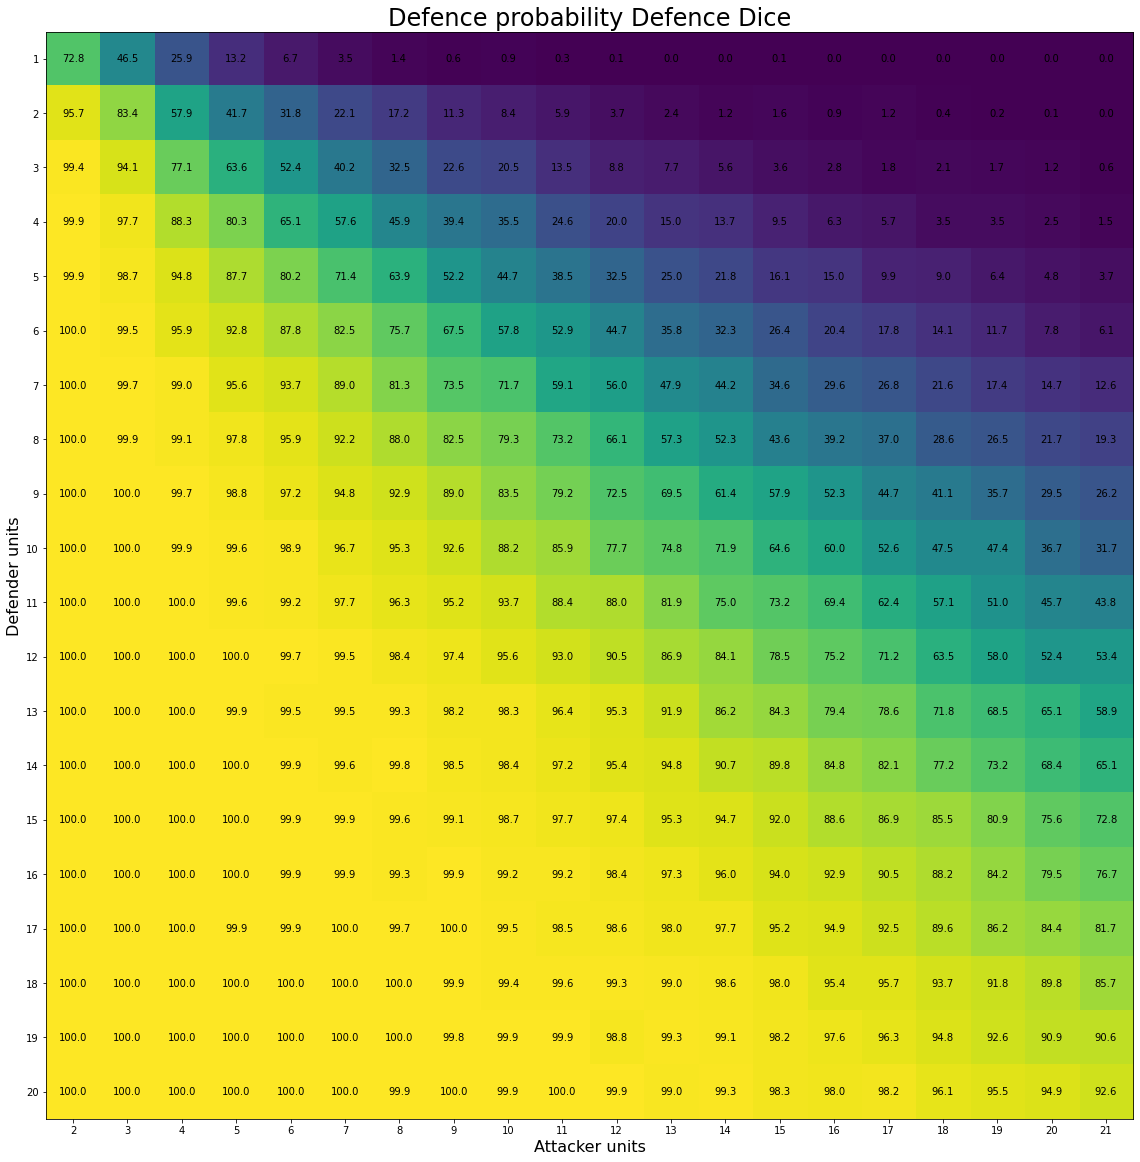

In [377]:
show("Defence probability Defence Dice")

In [381]:
maxT = 20
maxIter = 1000

stats = np.zeros((maxT,maxT))
for d in range(maxT):
    for a in range(maxT):
        s = 0
        for i in range(maxIter):
            s += play(d+1,a+2,dDice=True,dPlus=True,show=False)
        stats[d,a] = s / maxIter * 100 
        progres_bar(d*maxT + a + 1,maxT**2)

|████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00%


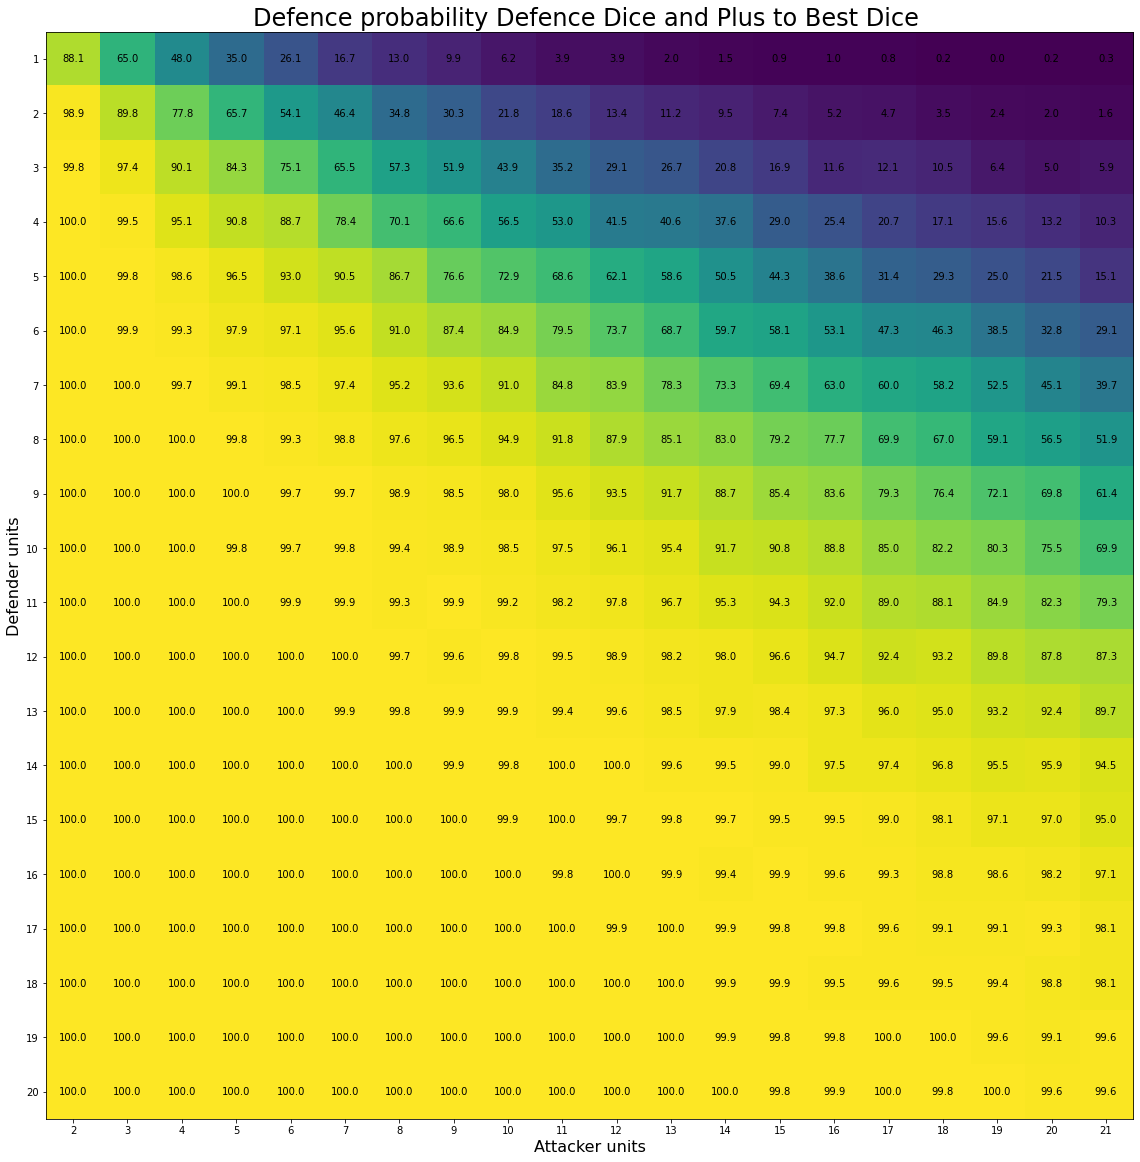

In [382]:
show("Defence probability Defence Dice and Plus to Best Dice ")

In [383]:
maxT = 20
maxIter = 1000

stats = np.zeros((maxT,maxT))
for d in range(maxT):
    for a in range(maxT):
        s = 0
        for i in range(maxIter):
            s += play(d+1,a+2,aDice=True,show=False)
        stats[d,a] = s / maxIter * 100 
        progres_bar(d*maxT + a + 1,maxT**2)

|████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00%


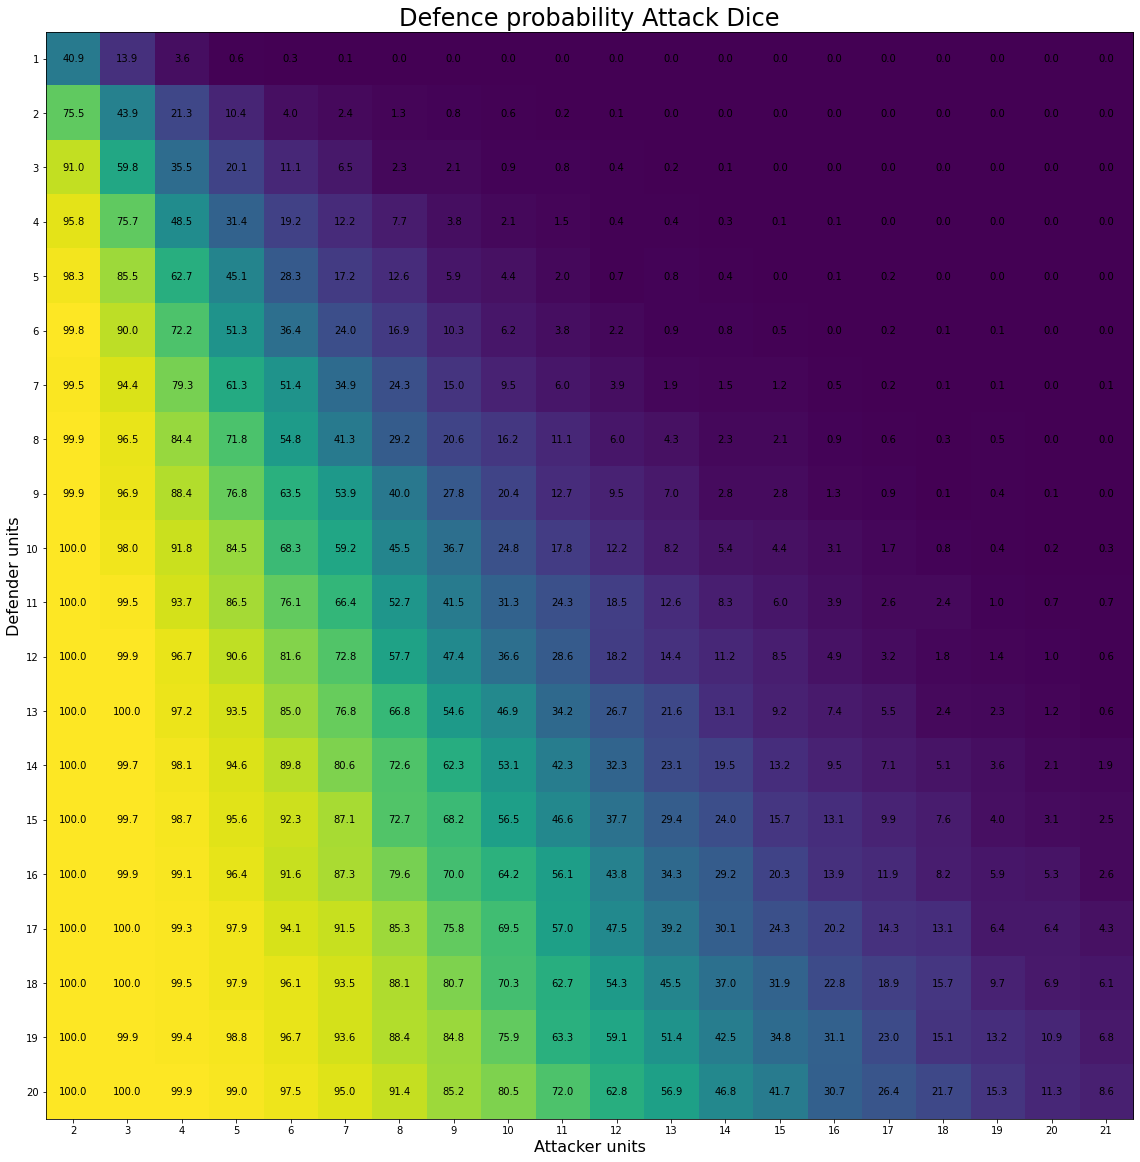

In [384]:
show("Defence probability Attack Dice")

In [385]:
maxT = 20
maxIter = 1000

stats = np.zeros((maxT,maxT))
for d in range(maxT):
    for a in range(maxT):
        s = 0
        for i in range(maxIter):
            s += play(d+1,a+2,aDice=True,aPlus=True,show=False)
        stats[d,a] = s / maxIter * 100 
        progres_bar(d*maxT + a + 1,maxT**2)

|████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00%


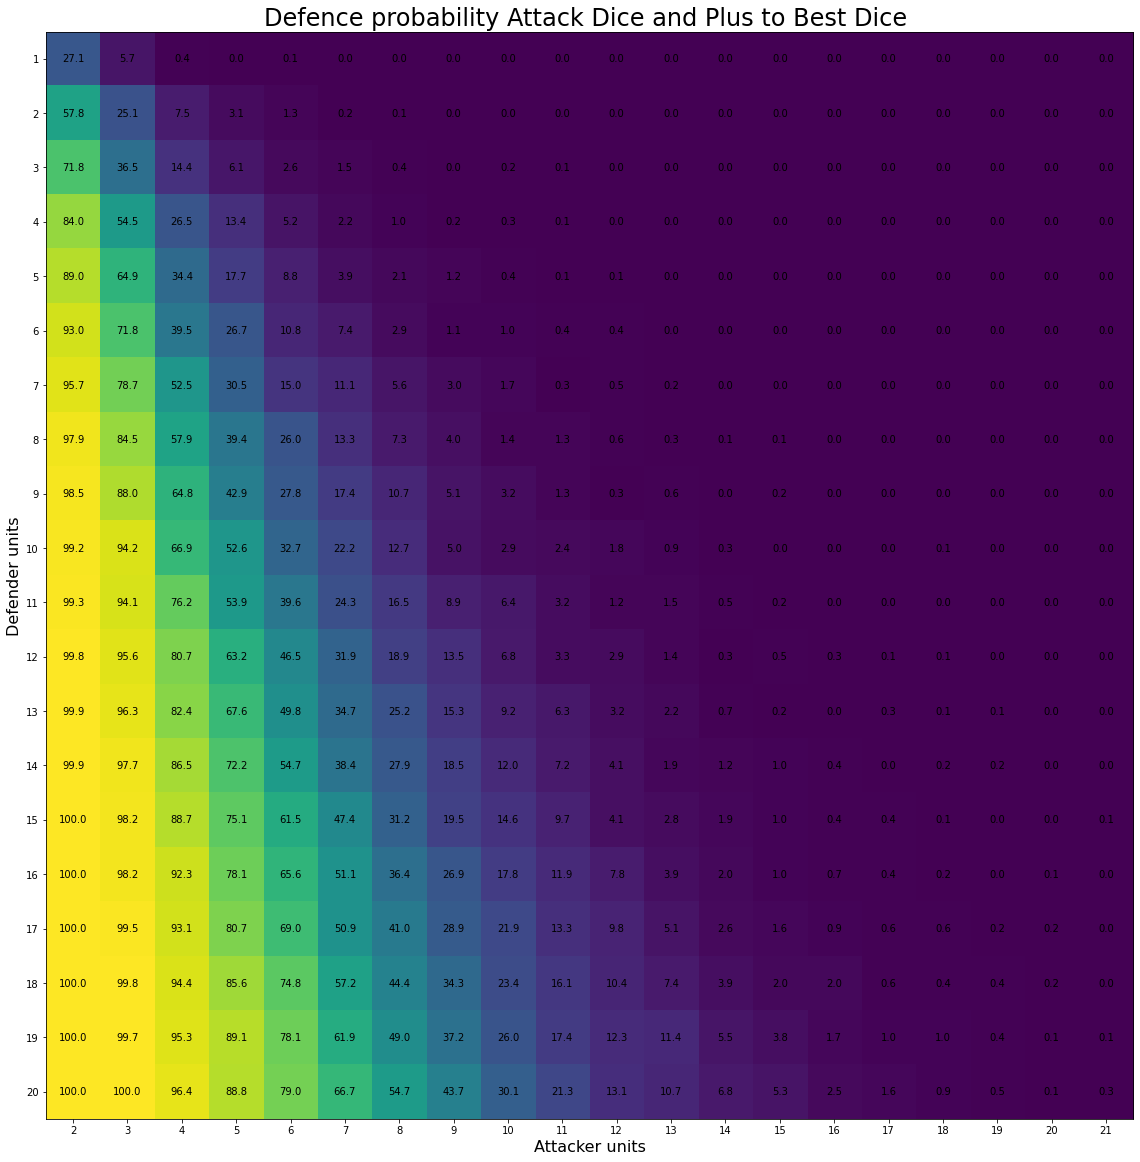

In [386]:
show("Defence probability Attack Dice and Plus to Best Dice ")